# Analiza prostih delovnih mest

Zbrala in analizirala sem podatke o prostih delovnih mestih za študentsko delo, ki jih objavlja [e-Študentski servis](https://www.studentski-servis.com/studenti/delo/prosta-dela). Podatki so bili zajeti novembra 2018, zato so aktualne ponudbe zdaj lahko drugačne. Če želimo, jih osvežimo tako, da ponovno poženemo skripto za shranjevanje spletne strani in za zbiranje podatkov. 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

pd.options.display.max_rows = 20

In [3]:
podatki_o_delovnih_mestih = pd.read_csv('podatki_o_delu.csv', sep=';', index_col='sifra', error_bad_lines=False)

b'Skipping line 2827: expected 8 fields, saw 9\n'


Zbrani so podatki o nazivu dela, kratek opis, kje, kako dolgo in s kakšnim delovnim časom poteka delo, koliko mest je na voljo in plačilo. Za lažjo analizo, je znesek plačila brez enote. Povsod, kjer enot ni, gre za *nek znesek* €/h neto. Za nekatera dela imajo zapis o plačilo v opisno obliki, kot na primer: *10€ na anketo* ali *po projektu*.

In [4]:
podatki_o_delovnih_mestih

,delovno_mesto,placilo,lokacija,opis,st_prostih_mest,trajanje,delovnik
sifra,,,,,,,
280638,POMOČ V STREŽBI,"5,50",LJUBLJANA,Podjetje išče dve osebi za pomožna dela v stre...,2,PODOGOVORU,Popoldan
280636,ADMINISTRATIVNA DELA,"4,50",LJUBLJANA,Podjetje potrebuje osebo višjega letnika študi...,1,PO DOGOVORU,Po dogovoru
280635,DELO V KUHINJI,"5,00",LJUBLJANA,Podjetje išče osebi za pomivanje posode. Zaže...,2,PODOGOVORU,Popoldan
280634,DELO V PROIZVODNJI,"4,22",LJUBLJANA,Znano farmacevtsko podjetje potrebuje polnole...,1,DLJE ČASA,Izmensko
280633,MARKETING,"5,92",LJUBLJANA,"Iščejo samostojno, proaktivno, iznajdljivo, za...",1,DLJE ČASA,Dopoldan
280632,NAKLADANJE/ RAZKLADANJE,"6,76",LOGATEC,Potrebujejo dva kandidata za razkladanje konte...,2,5 11.2018,Dopoldan
280630,FOTOKOPIRANJE,"4,00",MARIBOR,Podjetje potrebuje spretne osebe za pomoč v fo...,3,DLJE ČASA,Izmensko
280629,DELO S STRANKAMI,"5,00",LJUBLJANA,"Obvezno odlično znanje italijanskega jezika, o...",1,DLJE ČASA,Po dogovoru
280628,ADMINISTRATIVNA DELA,"5,00",LJUBLJANA,"Iščejo študenta ali študentko, ki zaključuje š...",1,"OD 1 DO 2 MESECEV, MOŽNO PODALJŠANJE.",Dopoldan


Opis dela ne pride v poštev za analizo, zato bom stolpec z opisom dela izločila iz nabora podatkov. Vseeno ostane v zgornji tabeli, saj je lahko uporaben, če se zanimamo za posamezna dela. Stolpec bi lahko izločila na sledeči način:  
dela = podatki_o_delovnih_mestih.drop(columns=['opis'])  
Vendar bom uporabila kar novo datoteko, v kateri sem iz podatkov izločila tudi oglase za delo z drugačno kot urno postavko. Torej oglase, ki so imeli pod plačilo navedeno kaj od: po dogovoru, po projektu, po izobrazbi, 10€ na anketo, 0,5€/kos in podobno.

In [5]:
dela = pd.read_csv('precisceni.csv', sep=';', index_col='sifra').drop(columns='opis')

Ponudbe za delo so večinoma v tekstovni obliki, zaradi česar je takšne podatke težje analizirati. Isto stvar se da povedati na različne načine. Vseeno, ko pogledamo, za koliko časa delodajalci razpisujejo dela, hitro opazimo, da v večini iščejo študente za dolgotrajnejše delo.

In [6]:
dela.groupby('trajanje').size().sort_values(ascending=False).head(8)

trajanje
 DLJE ČASA                    1947
 PO DOGOVORU                   599
 DLJE ČASA, PO POTREBI          32
 DLJE ČASA, PO DOGOVORU         24
 PO DOGOVORU, DLJE ČASA         17
 DALJ ČASA                      16
 DO SREDINE DECEMBRA            11
 DLJE ČASA OZ. PO DOGOVORU       9
dtype: int64

Povprečno plačilo za študentsko delo je nekoliko manj kot 5 €/h neto.

In [11]:
dela['placilo'].mean().round(2)

4.92

Po pričakovanjih je daleč največ ponudb za študentska dela v Ljubljani. Sledita Maribor in Celje.

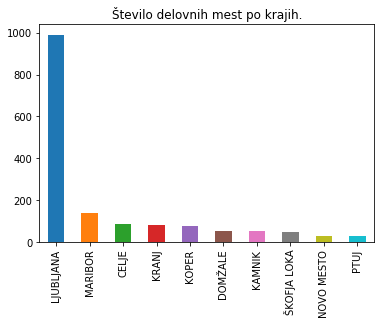

In [37]:
po_krajih = dela['lokacija'].value_counts().head(10)
po_krajih.plot(kind='bar', title='Število delovnih mest po krajih.', stacked=True)

Največ študentskih del je v strežbi. To sem pričakovala, me je pa presenetilo kako velik procent študentskih del je pravzaprav strežba ali druga rutinska dela, kot so fizična dela in delo na terenu. V večini gre za dela, ki jih študent sprejme zato, da ima delo, in ne zato, ker bi si želel delati na taknem delovnem mestu.

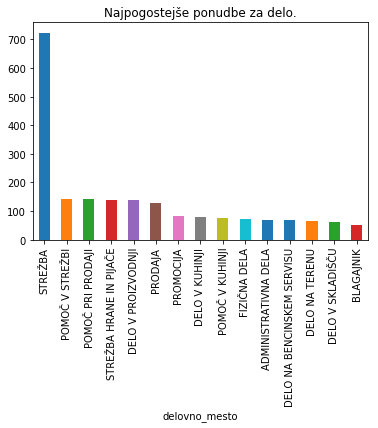

In [7]:
vrsta_dela = dela[['lokacija', 'delovno_mesto']].groupby('delovno_mesto').size().sort_values(ascending=False).head(15)
vrsta_dela.plot(kind='bar', title='Najpogostejše ponudbe za delo.', stacked=True)

Upoštevajoč vse oblike plačila, vidimo, da so študentska dela najpogosteje plačana minimalno, kar je 4 €/h neto. Precej veliko pa jih je z urno postavko 5 €/h.

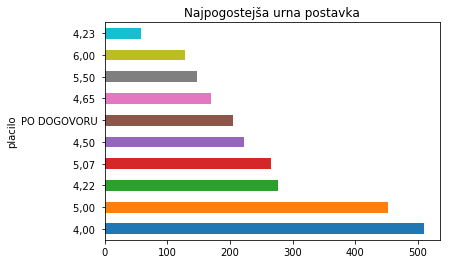

In [8]:
po_placilu = podatki_o_delovnih_mestih[['placilo']].groupby('placilo').size().sort_values(ascending=False).head(10)
po_placilu.plot(kind='barh', title='Najpogostejša urna postavka')

Zanimala me je povezava med tem koliko študentov iščejo na različno plačanih delovnih mestih.  
Zanimivo se mi zdi, da za dela, ki so nizko plačana iščejo razmeroma malo delavcev, med tem ko je za bolje plačana dela na voljo več mest.

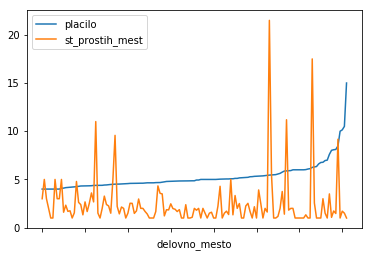

In [9]:
dela.groupby('delovno_mesto').mean().round(2).sort_values('placilo').plot()

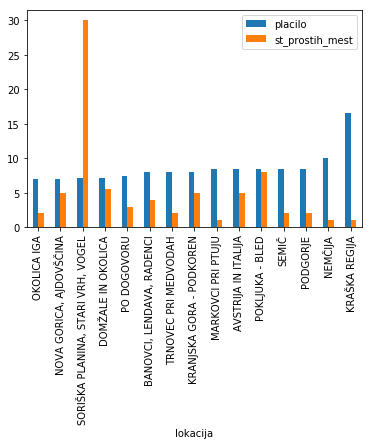

In [10]:
dela.groupby('lokacija').mean().round(2).sort_values('placilo').tail(15).plot.bar()

Vidimo, da so najbolje plačana dela res v Ljubljani in njeni okolici. V manjših krajih ne najdemo visoko plačanih študentskih del.

In [11]:
dela.groupby('lokacija')['placilo'].max().sort_values()

lokacija
SKORBA                     4.00
ŠENTJUR PRI CELJU          4.00
ROB PRI VELIKIH LAŠČAH     4.00
RIMSEK TOPLICE             4.00
ŠENTVID PRI GROBELNEM      4.00
LOKA                       4.00
ZAGORJE Z OKOLICO          4.00
SPODNJA POLSKAVA           4.00
CELJE CITY CENTER          4.00
ZAGORJE PRI PIVKI          4.00
                          ...  
TRZIN                     10.00
KRANJSKA GORA             10.00
KOPER                     10.00
SEŽANA                    11.01
MARIBOR                   12.67
IVANČNA GORICA            15.00
ŠKOFJA LOKA               15.00
KRAŠKA REGIJA             16.50
LJUBLJANA                 18.00
KAMNIK                    20.00
Name: placilo, Length: 583, dtype: float64

Povprečna plača za študentsko delo pa je najvišja za tujino in nekatere turistično pomenbne kraje. Povprečna plača za delo v Ljubljani ni med najvišlimi desetimi.

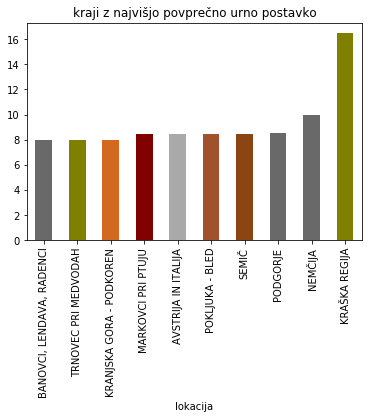

In [12]:
barve = ['dimgray', 'olive', 'chocolate', 'maroon', 'darkgray', 'sienna', 'saddlebrown']

dela.groupby('lokacija')['placilo'].mean().sort_values().tail(10).plot.bar(title='kraji z najvišjo povprečno urno postavko', color=barve)

Nekoliko me je presenetilo, da so dela z izmenskim delovnikom v povprečju nižje plačana od ostalih.
Vidimo pa tudi, da je največje povpraševanje za delo med vikendi.

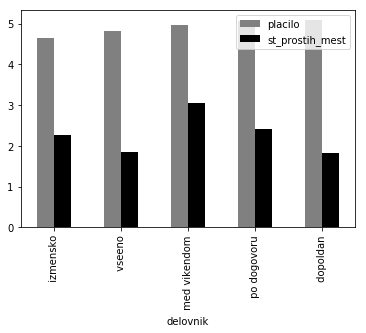

In [13]:
dela.groupby('delovnik').mean().round(2).sort_values('placilo').plot(kind='bar', color=['grey', 'black'])

Za strežbo je študent v povprečju najbolje plačan v Trnovcu pri Medvodah.  
Če namesto povprečne vrednosti pogledamo maksimalno, pa opazimo, da je najvišja ponujena plača za strežbo najvišja v Domžalah in Ljubljani.

In [14]:
dela[dela['delovno_mesto'] == 'STREŽBA'].groupby('lokacija').mean().drop(columns='st_prostih_mest').sort_values('placilo').tail(15)

,placilo
lokacija,
PODSMREKA PRI LJUBLJANI,5.50
DOB PRI DOMŽALAH,5.50
CERKVENJAK,5.92
BREZOVICA PRI LJUBLJANI,6.00
BENEDIKT,6.00
TRNOVO,6.00
IHAN,6.00
VELIKA PIREŠICA,6.00
LUKOVICA,6.00


V Ljubljani so najbolje plačana dela, za katera je potrebno kar nekaj znanja in izkušenj. To so učitelj, trener, programer in lektor.

In [19]:
dela[dela.lokacija == 'LJUBLJANA'].sort_values('placilo').tail(7)

,delovno_mesto,placilo,lokacija,st_prostih_mest,trajanje,delovnik
sifra,,,,,,
274849,POUČEVANJE,10.00,LJUBLJANA,3,DLJE ČASA,dopoldan
279603,PROGRAMIRANJE,10.14,LJUBLJANA,2,DLJE ČASA,po dogovoru
280028,POUČEVANJE,10.14,LJUBLJANA,2,6 MESECEV,po dogovoru
255730,PROGRAMIRANJE,10.98,LJUBLJANA,1,DLJE ČASA,po dogovoru
280286,TRENER/KA,12.00,LJUBLJANA,1,DLJE ČASA,dopoldan
270007,LEKTORIRANJE,15.00,LJUBLJANA,1,PO DOGOVORU (10-20 UR),po dogovoru
273008,POUČEVANJE,18.00,LJUBLJANA,1,DLJE ČASA,dopoldan


Za primer poglejmo delo učitelja. Urne postavke za to delo so v večini od 4 do 10 €/h neto, segajo pa tudi do 18 €/h neto.

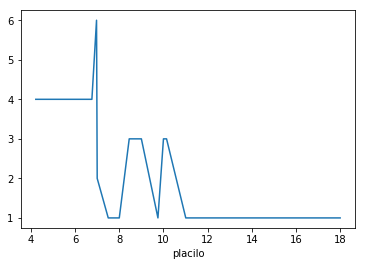

In [20]:
graf = dela[dela.delovno_mesto == 'POUČEVANJE'].sort_values('placilo').groupby('placilo').size().plot()

Poglejmo tipe delovnih mest, ki zaposlujejo največ študentov.

In [29]:
dela.groupby('delovno_mesto').max().sort_values('st_prostih_mest', ascending=False).head(10).drop(columns=['placilo', 'delovnik'])

,lokacija,st_prostih_mest,trajanje
delovno_mesto,,,
KRUPJE/ KRUPJEJKA,NOVA GORICA,40,PO DOGOVORU
UČITELJ SMUČANJA,"SORIŠKA PLANINA, STARI VRH, VOGEL",30,ZIMA 2018/2019
VZGOJITELJICA/ VZGOJITELJ,"SORIŠKA PLANINA, STARI VRH, VOGEL",30,DO 1. 3. 2019
PROMOCIJA,ZASAVJE,20,ZA DALJŠE ČASOVNO OBDOBJE
POMOČ PRI PRODAJI,ŠKOFJA LOKA,20,ZA DALJ ČASA
HOSTES/A,PORTOROŽ,20,OB PETKIH IN SOBOTAH
STREŽBA HRANE IN PIJAČE,ŽIRI,20,VIKENDI IN SEZONE (ZIMA-POLETJE)
PARKIRANJE VOZIL,KOPER,20,PO DOGOVORU
POMOČ V KUHINJI,ŽUSTERNA,20,"SEZONE ZIME, POLETJE IN VIKENDI"


Nazadnje poglejmo še delež študentskih del, ki so plačana do 5 €/h neto glede na vse ponudbe za delo. Opazimo, da je približno tretjina študentskih del plačana preko 5 €/h.

In [79]:
dela['nad_pet'] = dela['placilo'] > 5.00

In [80]:
dela_nad_pet = dela.groupby('nad_pet')

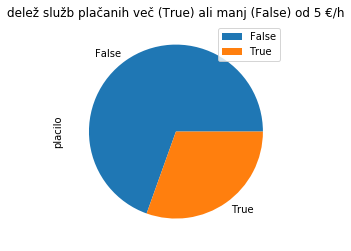

In [83]:
dela_nad_pet.count().plot(kind='pie', y='placilo', title='delež služb plačanih več (True) ali manj (False) od 5 €/h')